# Tobacco Plant Disease Prediction

## Importing libraries

In [1]:
# Importing the TensorFlow library for machine learning tasks.
import tensorflow as tf
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the Pandas library for data manipulation and analysis.
import pandas as pd
# Importing the Seaborn library for statistical data visualization.
import seaborn as sns
# Importing the os module for interacting with the operating system.
import os  
# Importing the random module for generating random numbers.
import random  
# Importing the time module for time-related operations.
import time  
# Importing a function for plotting Keras models.
from tensorflow.keras.utils import plot_model  
# Importing the Support Vector Classifier from Scikit-learn.
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

## Data Collection And Preprocessing

### Training Data Dataset - Data Collection and Preprocessing

In [2]:
# Load the training and validation sets
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 1692 files belonging to 5 classes.


## Counting Images in Training Set

In [3]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Count the number of images in each class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join('train', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

total_images = 0
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")
    total_images += count

print(f"Total images: {total_images}")

Class 'Tobacco___AlternariaLeafSpot_Virus': 339 images
Class 'Tobacco___Black_Shack': 339 images
Class 'Tobacco___Healthy': 339 images
Class 'Tobacco___Mosaic_Virus': 339 images
Class 'Tobacco___Potato_Virus': 336 images
Total images: 1692


In [4]:
## Displaying Sample Images in Training Set

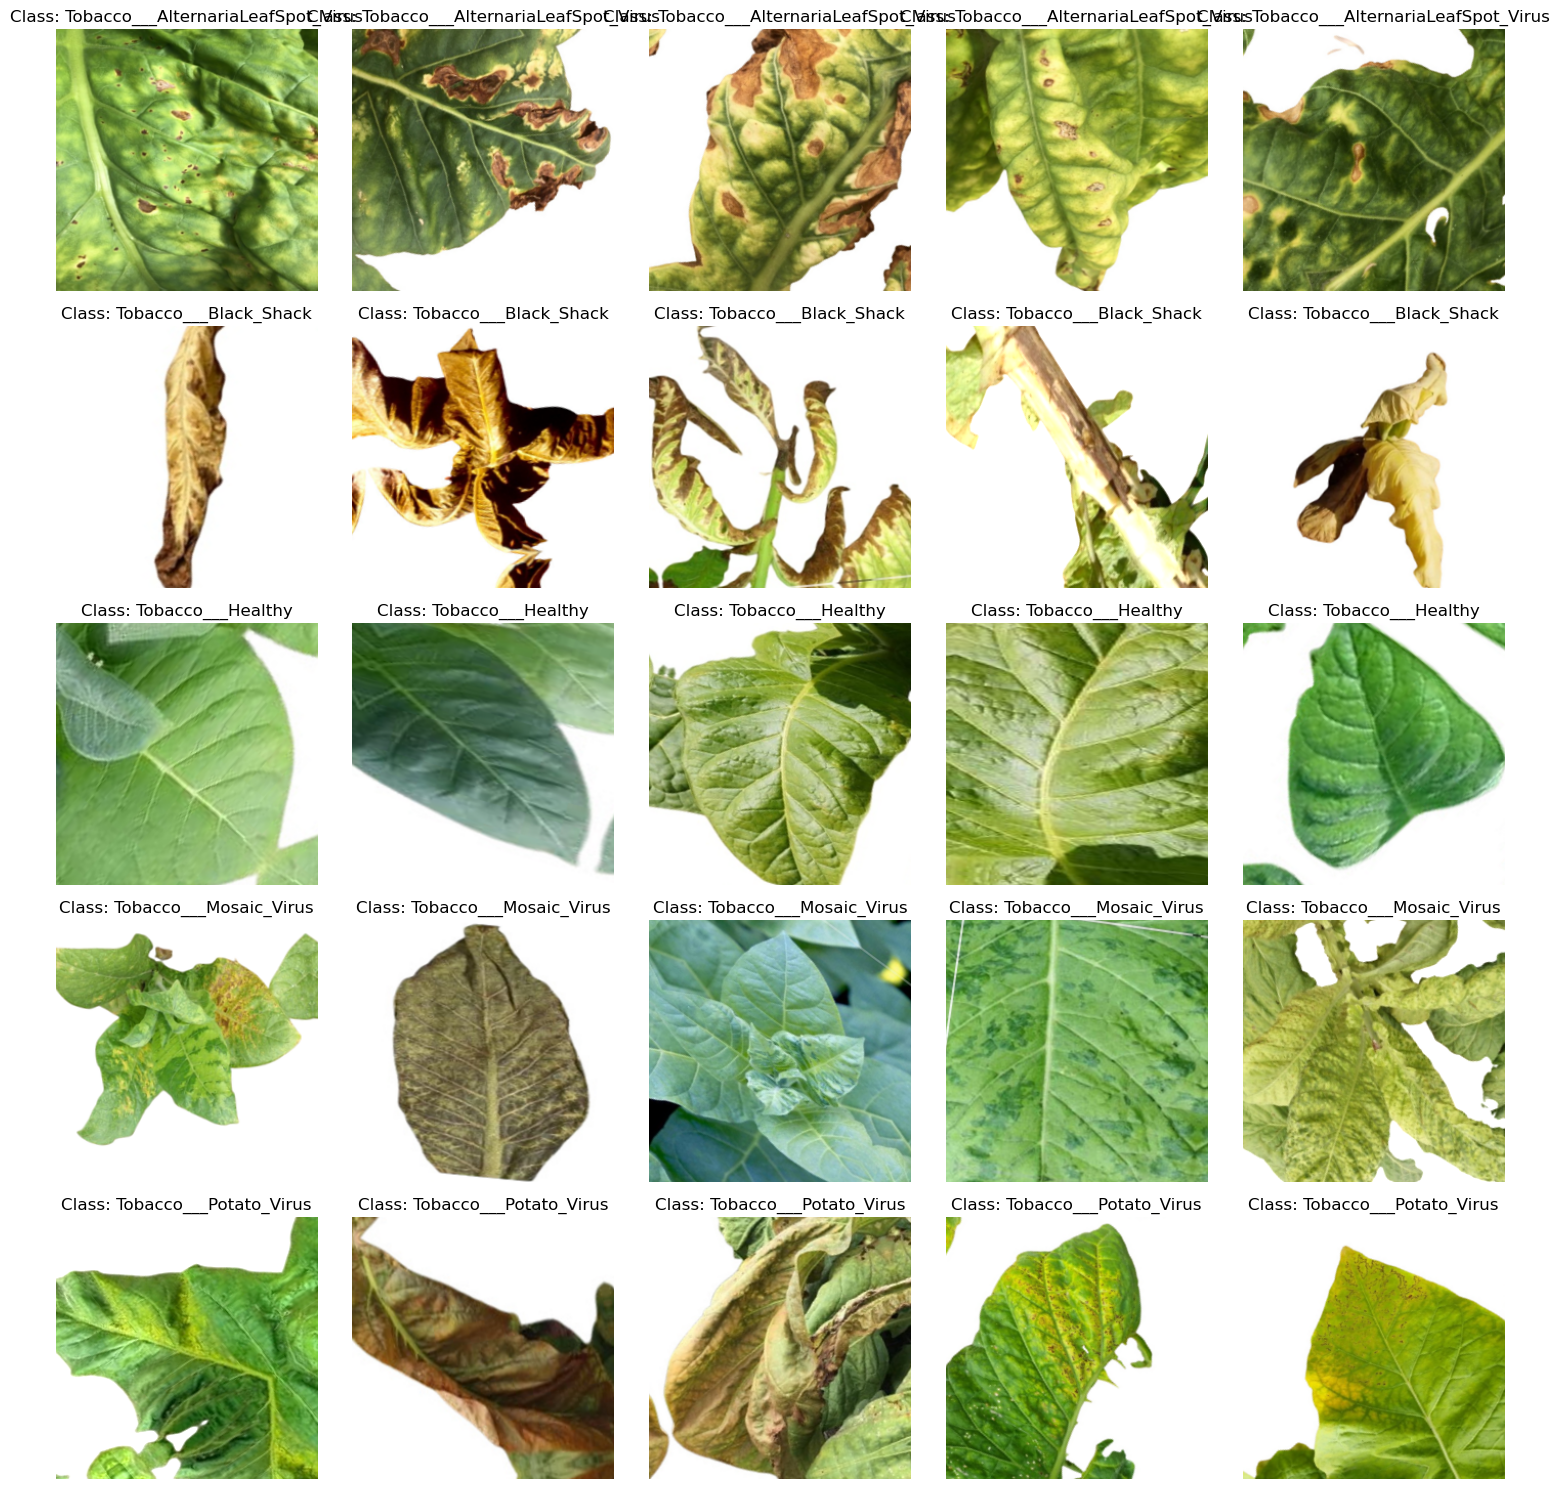

In [5]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Display 5 images of each class
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

for i, class_name in enumerate(class_names):
    class_path = os.path.join('train', class_name)
    class_images = os.listdir(class_path)
    sample_images = random.sample(class_images, 5)
    
    for j, image_name in enumerate(sample_images):
        image_path = os.path.join(class_path, image_name)
        image = plt.imread(image_path)
        axes[i, j].imshow(image)
        axes[i, j].set_title(f"Class: {class_name}")
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()

### Validation DataSet - Data Collection and PreProcessing

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)


Found 450 files belonging to 5 classes.


## Counting Images in Valid Set

In [7]:
# Get the input path for the training set
input_path = training_set.file_paths

# Get the class names
class_names = training_set.class_names

# Count the number of images in each class
class_counts = {}
for class_name in class_names:
    class_path = os.path.join('valid', class_name)
    class_count = len(os.listdir(class_path))
    class_counts[class_name] = class_count

# Print the class counts
for class_name, count in class_counts.items():
    print(f"Class '{class_name}': {count} images")
    total_images += count

Class 'Tobacco___AlternariaLeafSpot_Virus': 90 images
Class 'Tobacco___Black_Shack': 90 images
Class 'Tobacco___Healthy': 90 images
Class 'Tobacco___Mosaic_Virus': 90 images
Class 'Tobacco___Potato_Virus': 90 images


## BUILDING MODEL

### Building Convolution Layer - ALGORITHM ARCHITECTURE

In [8]:
# Create the CNN model
cnn = tf.keras.models.Sequential()

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [12]:
cnn.add(Dense(units=5, activation='softmax'))

In [13]:
## Compiling and Training Phase

## CNN HYPERPARAMETER TUNING

In [14]:
# Compile the CNN model
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-08,
    decay=0.0005,
    amsgrad=False),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                   

In [16]:
# Define early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Metric to monitor for early stopping
    patience=3,           # Number of epochs with no improvement before stopping
    restore_best_weights=True  # Restore the weights of the best epoch
)

In [17]:
start_time = time.time()
# Fit the model with early stopping
training_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=15,
    callbacks=[early_stopping]  # Pass the early stopping callback
)
end_time = time.time()

total_time = end_time - start_time
training_time_minutes = total_time / 60

print(f"Total training time: {training_time_minutes:.2f} minutes")

Epoch 1/15


53/53 [==============================] - 227s 4s/step - loss: 1.6381 - accuracy: 0.3387 - val_loss: 1.1270 - val_accuracy: 0.4333
Epoch 2/15
53/53 [==============================] - 116s 2s/step - loss: 1.1222 - accuracy: 0.5154 - val_loss: 1.0414 - val_accuracy: 0.4622
Epoch 3/15
53/53 [==============================] - 110s 2s/step - loss: 0.9919 - accuracy: 0.5780 - val_loss: 1.0123 - val_accuracy: 0.5222
Epoch 4/15
53/53 [==============================] - 109s 2s/step - loss: 0.9202 - accuracy: 0.6082 - val_loss: 1.0309 - val_accuracy: 0.6000
Epoch 5/15
53/53 [==============================] - 106s 2s/step - loss: 0.7926 - accuracy: 0.6738 - val_loss: 0.8107 - val_accuracy: 0.6556
Epoch 6/15
53/53 [==============================] - 106s 2s/step - loss: 0.7692 - accuracy: 0.6613 - val_loss: 0.9035 - val_accuracy: 0.6156
Epoch 7/15
53/53 [==============================] - 107s 2s/step - loss: 0.6121 - accuracy: 0.7376 - val_loss: 0.8439 - val_accuracy: 0.6178
Epoch 8/15


## Loss Gradient Graph

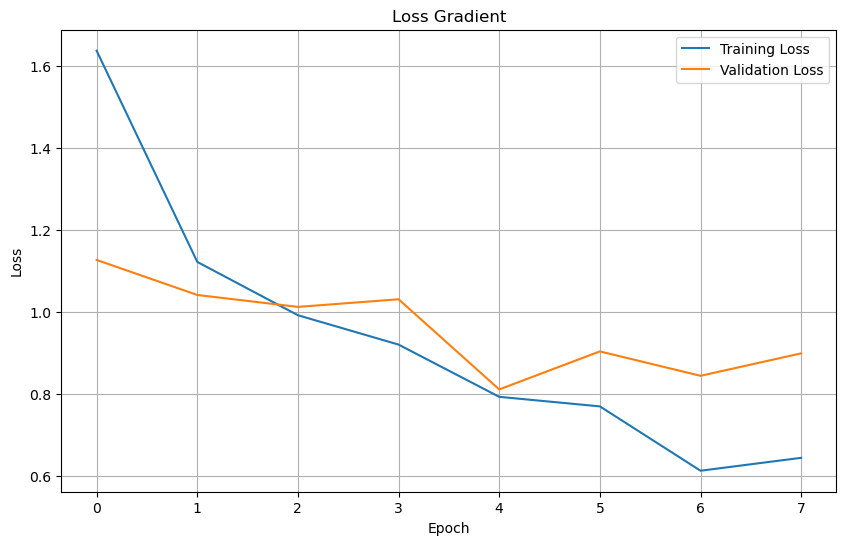

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Gradient')
plt.legend()
plt.grid(True)
plt.show()

## CNN MODEL EVALUATION

## CNN TRAINING ACCURACY

In [19]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

53/53 [==============================] - 26s 487ms/step - loss: 0.6346 - accuracy: 0.7405
Training accuracy: 0.7405437231063843


## CNN VALIDATION ACCURACY

In [20]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

15/15 [==============================] - 6s 401ms/step - loss: 0.8107 - accuracy: 0.6556
Validation accuracy: 0.6555555462837219


## CNN SAVING MODEL

In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history #Return Dictionary of history

{'loss': [1.6381163597106934,
  1.1221596002578735,
  0.9919241666793823,
  0.9201839566230774,
  0.7925584316253662,
  0.7692422270774841,
  0.6120520234107971,
  0.6435723900794983],
 'accuracy': [0.33865249156951904,
  0.5153664350509644,
  0.5780141949653625,
  0.6081560254096985,
  0.673758864402771,
  0.661347508430481,
  0.73758864402771,
  0.7458629012107849],
 'val_loss': [1.1270066499710083,
  1.0414239168167114,
  1.0122958421707153,
  1.0309185981750488,
  0.8106773495674133,
  0.9035387635231018,
  0.8439480066299438,
  0.898760199546814],
 'val_accuracy': [0.4333333373069763,
  0.46222221851348877,
  0.5222222208976746,
  0.6000000238418579,
  0.6555555462837219,
  0.6155555844306946,
  0.6177777647972107,
  0.653333306312561]}

In [23]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [24]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## CNN ACCURACY VISUALISATION

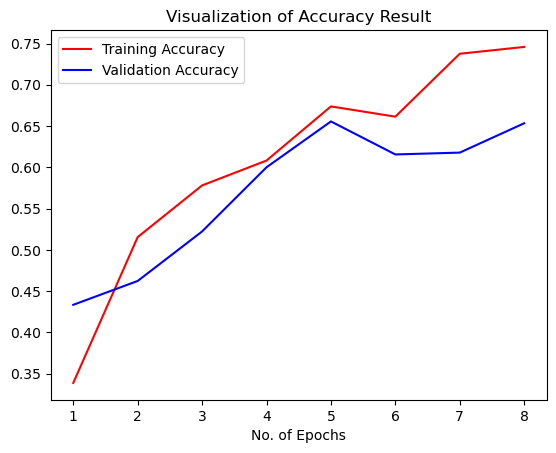

In [25]:
epochs = range(1, len(training_history.history['accuracy']) + 1)

plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## TESTING SET

In [26]:
class_name = validation_set.class_names

In [27]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 450 files belonging to 5 classes.


In [28]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

450/450 [==============================] - 17s 36ms/step


In [29]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [30]:
Y_true

<tf.Tensor: shape=(450,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
     

In [31]:
predicted_categories

<tf.Tensor: shape=(450,), dtype=int64, numpy=
array([4, 1, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 1, 3, 3, 3,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3,
       3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3,
       2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3,
     

In [32]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [33]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                    precision    recall  f1-score   support

Tobacco___AlternariaLeafSpot_Virus       0.79      0.71      0.75        90
             Tobacco___Black_Shack       0.80      1.00      0.89        90
                 Tobacco___Healthy       0.49      0.47      0.48        90
            Tobacco___Mosaic_Virus       0.40      0.49      0.44        90
            Tobacco___Potato_Virus       0.93      0.61      0.74        90

                          accuracy                           0.66       450
                         macro avg       0.68      0.66      0.66       450
                      weighted avg       0.68      0.66      0.66       450



## CNN PRECISION METRICS

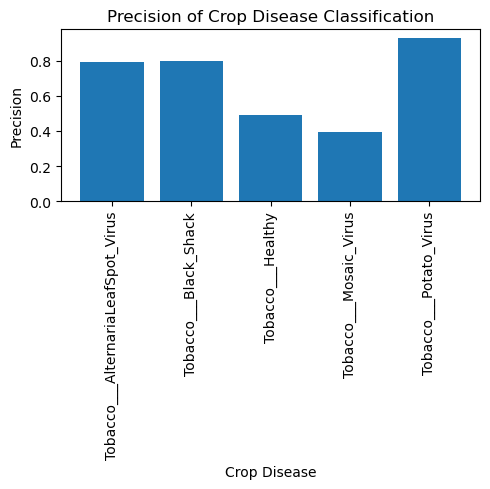

In [34]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
precisions = [report[class_name]['precision'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, precisions)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Precision')
plt.title('Precision of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN RECALL METRICS

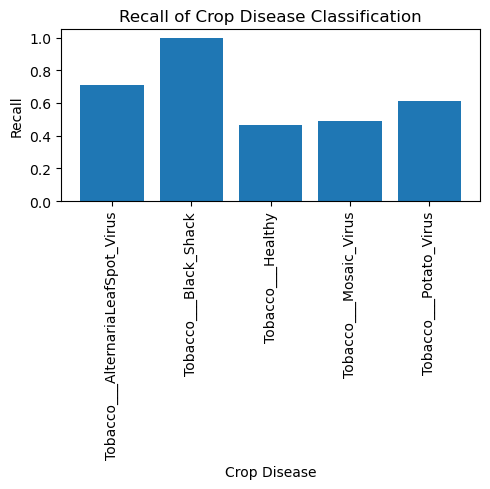

In [35]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
recalls = [report[class_name]['recall'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, recalls)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Recall')
plt.title('Recall of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN F1 SCORE METRICS

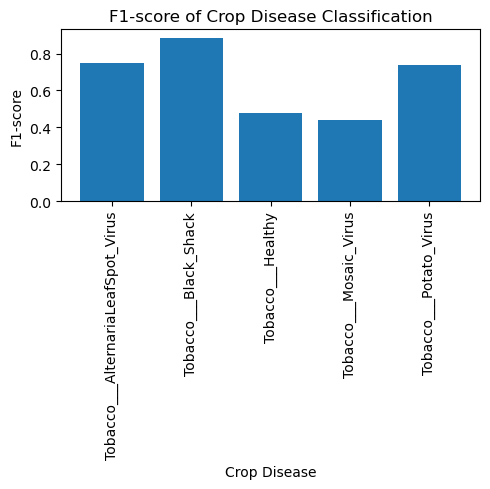

In [36]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
f1_scores = [report[class_name]['f1-score'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, f1_scores)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('F1-score')
plt.title('F1-score of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN SUPPORT METRICS

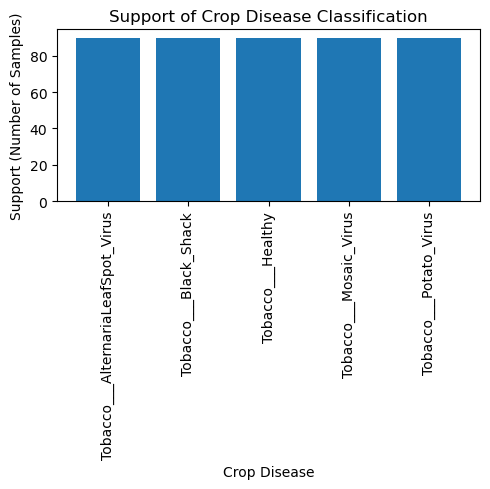

In [37]:
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt
# Importing the classification_report function from Scikit-learn.
from sklearn.metrics import classification_report
class_names = validation_set.class_names
report = classification_report(Y_true, predicted_categories, target_names=class_names, output_dict=True)
supports = [report[class_name]['support'] for class_name in class_names]
plt.figure(figsize=(5, 5))
plt.bar(class_names, supports)
plt.xticks(rotation=90)
plt.xlabel('Crop Disease')
plt.ylabel('Support (Number of Samples)')
plt.title('Support of Crop Disease Classification')
plt.tight_layout()
plt.show()

## CNN CONFUSION MATRIX

<Figure size 800x600 with 0 Axes>

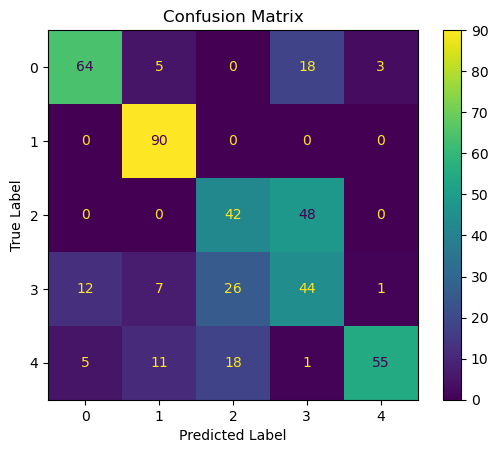

In [38]:
# Importing the confusion_matrix and ConfusionMatrixDisplay functions from Scikit-learn.
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Importing the Matplotlib library for data visualization.
import matplotlib.pyplot as plt

# Get the true labels and the predicted labels

# Create a confusion matrix
cm = confusion_matrix(Y_true, predicted_categories)

# Create a figure and display the confusion matrix
plt.figure(figsize=(8, 6))
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## CNN PLOT MODEL ARCHITECTURE

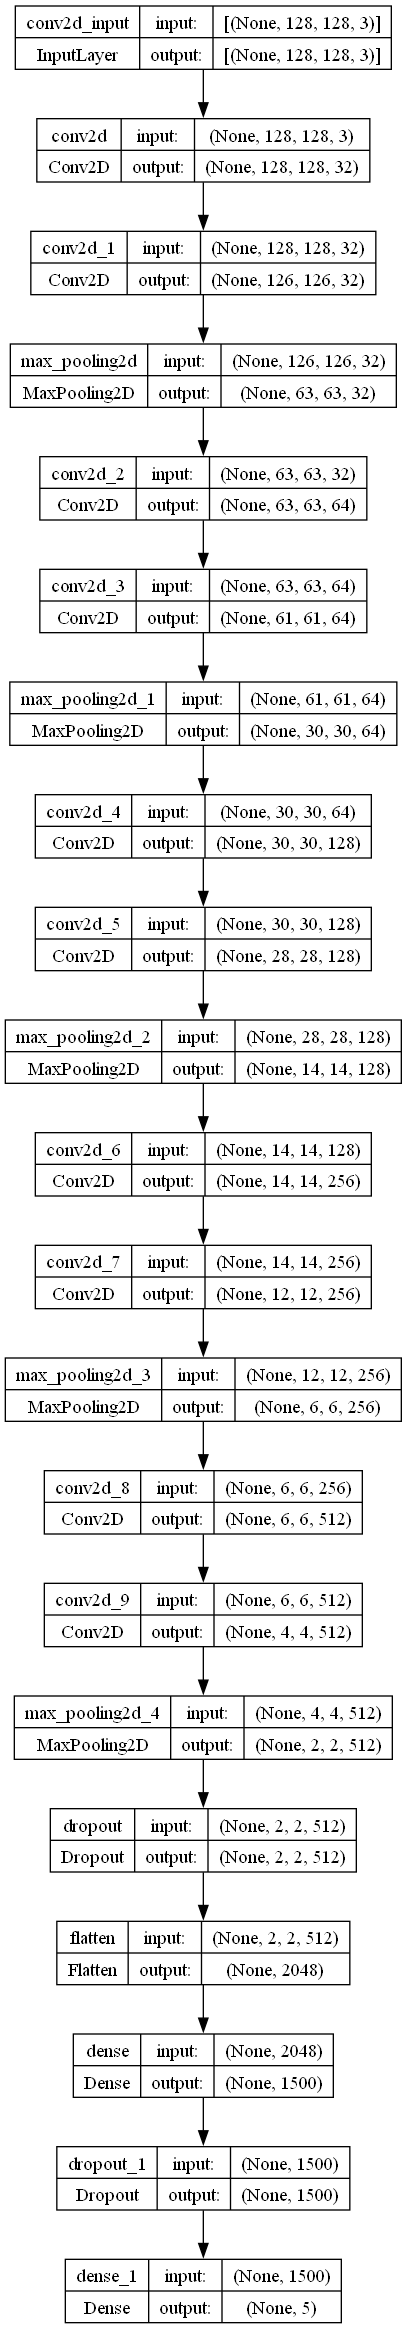

In [39]:
plot_model(cnn, show_shapes=True, show_layer_names=True, expand_nested=True)

In [40]:
## SEQUENTIAL MODEL ARCHITECTURE

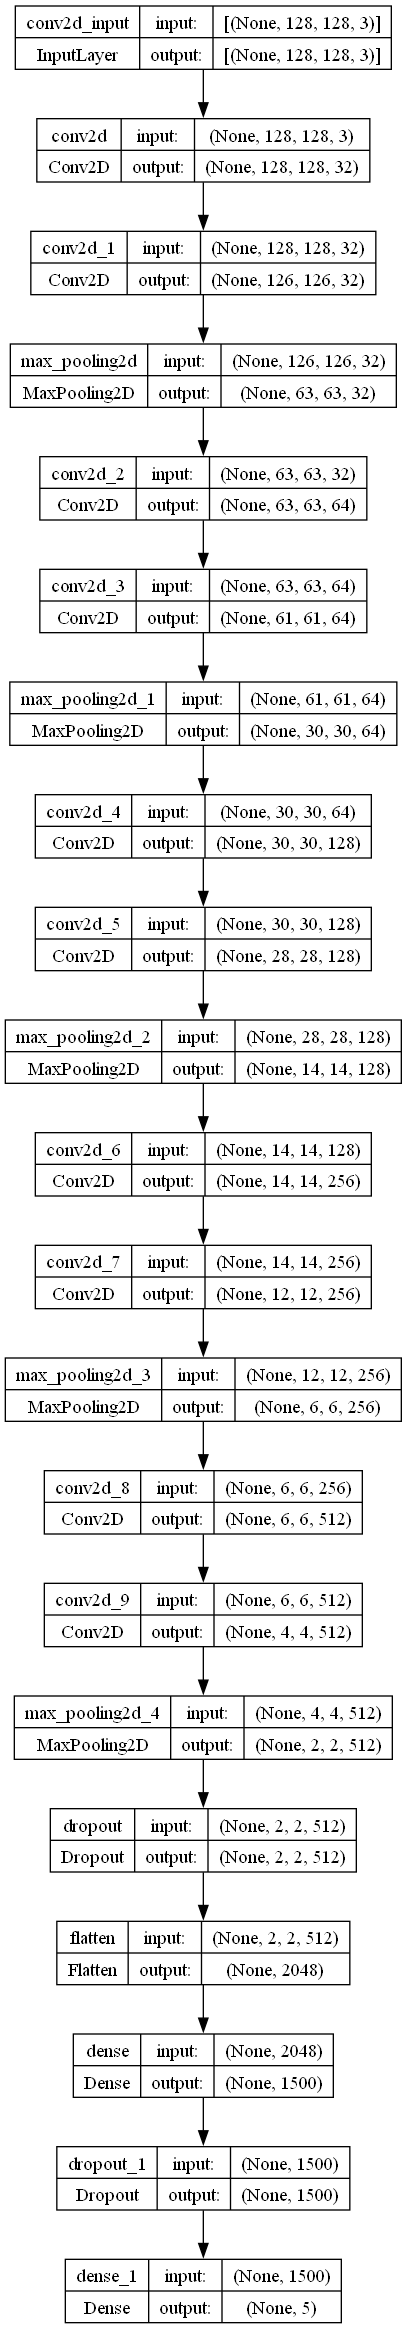

In [41]:
plot_model(cnn, to_file='model_architecture.png', show_shapes=True)

## ........................................CNN -SVM.............................................................................

## SVM FEATURE EXTRACTION AND TRAINING

In [42]:
# Extract features using the trained CNN model
feature_extractor = tf.keras.Model(inputs=cnn.input, outputs=cnn.layers[-4].output)

In [43]:
def extract_features(dataset):
    features = []
    labels = []
    for images, label_batch in dataset:
        feature_batch = feature_extractor.predict(images)
        features.append(feature_batch)
        labels.append(label_batch.numpy())
    return np.concatenate(features), np.concatenate(labels)

In [44]:
import numpy as np

In [45]:
train_features, train_labels = extract_features(training_set)
valid_features, valid_labels = extract_features(validation_set)

1/1 [==============================] - 0s 78ms/step


In [46]:
# Flatten the features for the SVM
train_features = train_features.reshape(train_features.shape[0], -1)
valid_features = valid_features.reshape(valid_features.shape[0], -1)


In [47]:
# Convert labels to one-hot encoded format
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels.argmax(axis=1))
valid_labels = lb.transform(valid_labels.argmax(axis=1))

## TRAINING SVM CLASSFIER

In [48]:
# Train the SVM classifier
svm = SVC(kernel='linear', probability=True)
svm.fit(train_features, train_labels.argmax(axis=1))

SVC(kernel='linear', probability=True)

## SVM VALUDATION ACCURACY

In [49]:
# Predict on validation set
svm_predictions = svm.predict(valid_features)
accuracy = accuracy_score(valid_labels.argmax(axis=1), svm_predictions)
print(f"SVM Validation Accuracy: {accuracy:.2f}")

SVM Validation Accuracy: 0.67


## SVM TRAINING ACCURACY

In [50]:
# Train the SVM model
svm.fit(train_features, train_labels.argmax(axis=1))

# Predict on training set
train_predictions = svm.predict(train_features)
train_accuracy = accuracy_score(train_labels.argmax(axis=1), train_predictions)
print(f"SVM Training Accuracy: {train_accuracy:.2f}")

SVM Training Accuracy: 1.00


## SVM CLASSIFICATION REPORT

In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
# Make predictions on the validation set
val_predictions = svm.predict(valid_features)

# Generate the classification report
report = classification_report(valid_labels.argmax(axis=1), val_predictions, target_names=training_set.class_names)

# Print the classification report
print("Classification Report:")
print(report)

Classification Report:
                                    precision    recall  f1-score   support

Tobacco___AlternariaLeafSpot_Virus       0.73      0.70      0.72        90
             Tobacco___Black_Shack       0.96      0.98      0.97        90
                 Tobacco___Healthy       0.50      0.34      0.41        90
            Tobacco___Mosaic_Virus       0.38      0.47      0.42        90
            Tobacco___Potato_Virus       0.79      0.86      0.82        90

                          accuracy                           0.67       450
                         macro avg       0.67      0.67      0.67       450
                      weighted avg       0.67      0.67      0.67       450



## SVM PRECISION METRICS

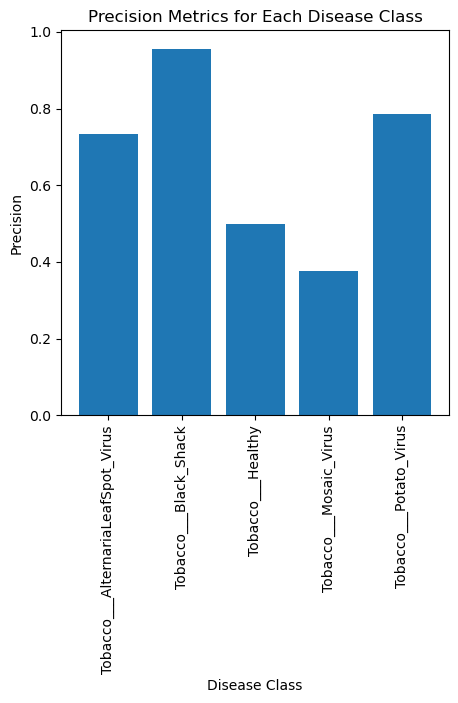

In [52]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the validation set
val_predictions = svm.predict(valid_features)

# Generate the classification report
report = classification_report(valid_labels.argmax(axis=1), val_predictions, target_names=training_set.class_names, output_dict=True)


# Extract precision metrics for each disease class
precision_metrics = {}
for class_name in training_set.class_names:
    precision_metrics[class_name] = report[class_name]['precision']

# Plot precision metrics
plt.figure(figsize=(5, 5))
plt.bar(precision_metrics.keys(), precision_metrics.values())
plt.xticks(rotation=90)
plt.xlabel('Disease Class')
plt.ylabel('Precision')
plt.title('Precision Metrics for Each Disease Class')
plt.show()

## SVM RECALL METRICS

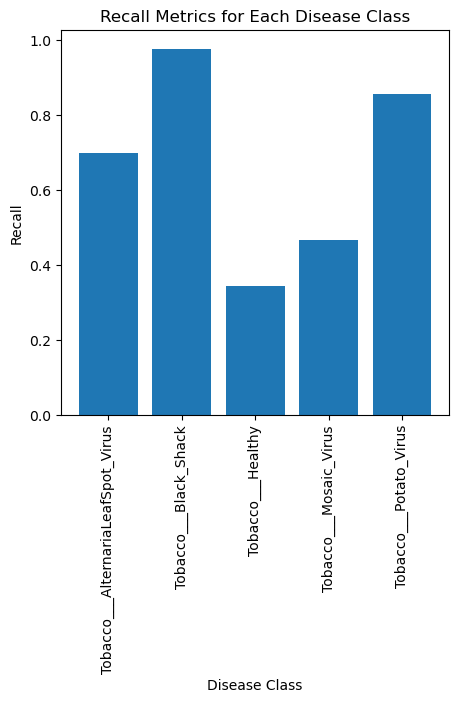

In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Make predictions on the validation set
val_predictions = svm.predict(valid_features)

# Generate the classification report
report = classification_report(valid_labels.argmax(axis=1), val_predictions, target_names=training_set.class_names, output_dict=True)



# Extract recall metrics for each disease class
recall_metrics = {}
for class_name in training_set.class_names:
    recall_metrics[class_name] = report[class_name]['recall']

# Plot recall metrics
plt.figure(figsize=(5, 5))
plt.bar(recall_metrics.keys(), recall_metrics.values())
plt.xticks(rotation=90)
plt.xlabel('Disease Class')
plt.ylabel('Recall')
plt.title('Recall Metrics for Each Disease Class')
plt.show()

## SVM F1 SCORE METRICS

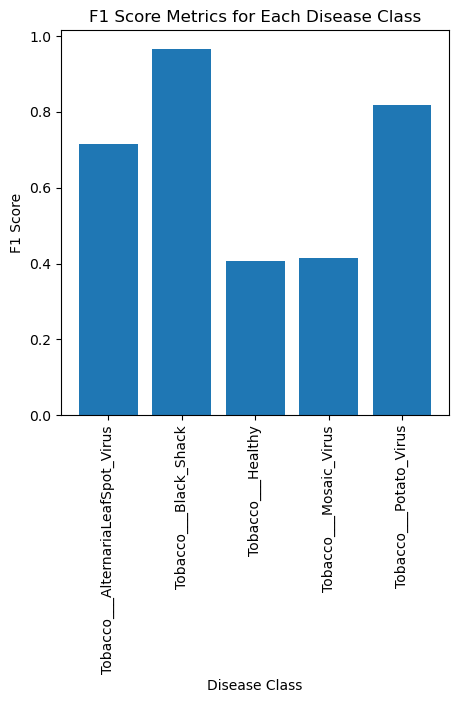

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Make predictions on the validation set
val_predictions = svm.predict(valid_features)

# Generate the classification report
report = classification_report(valid_labels.argmax(axis=1), val_predictions, target_names=training_set.class_names, output_dict=True)



# Extract F1 score metrics for each disease class
f1_score_metrics = {}
for class_name in training_set.class_names:
    f1_score_metrics[class_name] = report[class_name]['f1-score']

# Plot F1 score metrics
plt.figure(figsize=(5, 5))
plt.bar(f1_score_metrics.keys(), f1_score_metrics.values())
plt.xticks(rotation=90)
plt.xlabel('Disease Class')
plt.ylabel('F1 Score')
plt.title('F1 Score Metrics for Each Disease Class')
plt.show()

## SVM SUPPORT METRICS

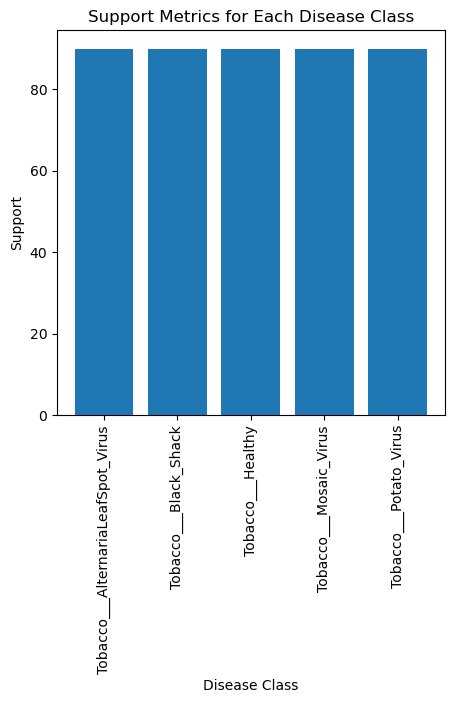

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Make predictions on the validation set
val_predictions = svm.predict(valid_features)

# Generate the classification report
report = classification_report(valid_labels.argmax(axis=1), val_predictions, target_names=training_set.class_names, output_dict=True)


# Extract support metrics for each disease class
support_metrics = {}
for class_name in training_set.class_names:
    support_metrics[class_name] = report[class_name]['support']

# Plot support metrics
plt.figure(figsize=(5, 5))
plt.bar(support_metrics.keys(), support_metrics.values())
plt.xticks(rotation=90)
plt.xlabel('Disease Class')
plt.ylabel('Support')
plt.title('Support Metrics for Each Disease Class')
plt.show()

In [56]:
## SVM CONFUSION MATRIX

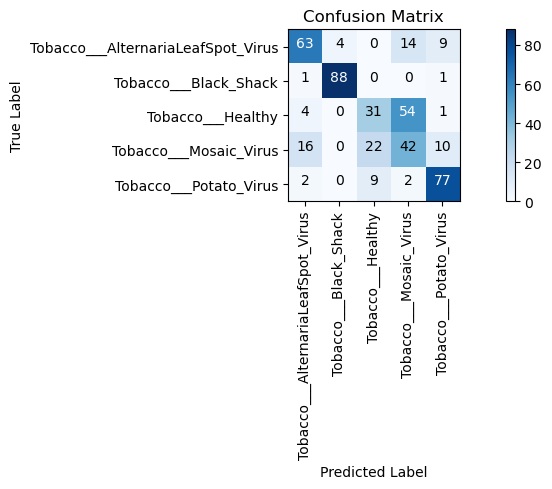

In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the validation set
val_predictions = svm.predict(valid_features)

# Generate the classification report
report = classification_report(valid_labels.argmax(axis=1), val_predictions, target_names=training_set.class_names)

# Generate the confusion matrix
cm = confusion_matrix(valid_labels.argmax(axis=1), val_predictions)

# Display the confusion matrix
plt.figure(figsize=(10, 5))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(training_set.class_names))
plt.xticks(tick_marks, training_set.class_names, rotation=90)
plt.yticks(tick_marks, training_set.class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add the numbers inside the confusion matrix plot
thresh = cm.max() / 2.0
for i in range(len(training_set.class_names)):
    for j in range(len(training_set.class_names)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



## SAVE CNN -SVM

In [58]:
import joblib
# Save the trained SVM model
joblib.dump(svm, 'svm_model.pkl')

['svm_model.pkl']